<a href="https://colab.research.google.com/github/SherazKhan/Motor/blob/master/Motor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://github.com/SherazKhan/Motor/blob/master/human-activity.jpg?raw=1'>

<br>
<center>    
    <h1> Human Activity Recognition </h1>    
</center>
<br>

<br>

https://medium.com/@rubeen.786.mr/human-activity-recognition-har-db5c1432cd98

The main idea for this notebook is to build a model that predicts the human activities such as Walking, Walking_Upstairs, Walking_Downstairs, Sitting, Standing or Laying.

This dataset is collected from 30 persons(referred as subjects in this dataset), performing different activities with a smartphone to their waists. The data is recorded with the help of sensors (accelerometer and Gyroscope) in that smartphone. This experiment was video recorded to label the data manually.

This dataset is downloaded from:

http://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones

## How data was recorded

By using the sensors(Gyroscope and accelerometer) in a smartphone, they have captured '3-axial linear acceleration'(_tAcc-XYZ_) from accelerometer and '3-axial angular velocity' (_tGyro-XYZ_) from Gyroscope with several variations. 

> prefix 't' in those metrics denotes time.

> suffix 'XYZ' represents 3-axial signals in X , Y, and Z directions.

### Feature names

1. These sensor signals are preprocessed by applying noise filters and then sampled in fixed-width windows(sliding windows) of 2.56 seconds each with 50% overlap. ie., each window has 128 readings. 

2. From Each window, a feature vector was obtianed by calculating variables from the time and frequency domain.
> In our dataset, each datapoint represents a window with different readings 
3. The accelertion signal was saperated into Body and Gravity acceleration signals(___tBodyAcc-XYZ___ and ___tGravityAcc-XYZ___) using some low pass filter with corner frequecy of 0.3Hz.

4. After that, the body linear acceleration and angular velocity were derived in time to obtian _jerk signals_ (___tBodyAccJerk-XYZ___ and ___tBodyGyroJerk-XYZ___). 

5. The magnitude of these 3-dimensional signals were calculated using the Euclidian norm. This magnitudes are represented as features with names like _tBodyAccMag_, _tGravityAccMag_, _tBodyAccJerkMag_, _tBodyGyroMag_ and _tBodyGyroJerkMag_.

6. Finally, We've got frequency domain signals from some of the available signals by applying a FFT (Fast Fourier Transform). These signals obtained were labeled with ___prefix 'f'___ just like original signals with ___prefix 't'___. These signals are labeled as ___fBodyAcc-XYZ___, ___fBodyGyroMag___ etc.,.

7. These are the signals that we got so far.
	+ tBodyAcc-XYZ
	+ tGravityAcc-XYZ
	+ tBodyAccJerk-XYZ
	+ tBodyGyro-XYZ
	+ tBodyGyroJerk-XYZ
	+ tBodyAccMag
	+ tGravityAccMag
	+ tBodyAccJerkMag
	+ tBodyGyroMag
	+ tBodyGyroJerkMag
	+ fBodyAcc-XYZ
	+ fBodyAccJerk-XYZ
	+ fBodyGyro-XYZ
	+ fBodyAccMag
	+ fBodyAccJerkMag
	+ fBodyGyroMag
	+ fBodyGyroJerkMag

8. We can esitmate some set of variables from the above signals. ie., We will estimate the following properties on each and every signal that we recoreded so far.

	+ ___mean()___: Mean value
	+ ___std()___: Standard deviation
	+ ___mad()___: Median absolute deviation 
	+ ___max()___: Largest value in array
	+ ___min()___: Smallest value in array
	+ ___sma()___: Signal magnitude area
	+ ___energy()___: Energy measure. Sum of the squares divided by the number of values. 
	+ ___iqr()___: Interquartile range 
	+ ___entropy()___: Signal entropy
	+ ___arCoeff()___: Autorregresion coefficients with Burg order equal to 4
	+ ___correlation()___: correlation coefficient between two signals
	+ ___maxInds()___: index of the frequency component with largest magnitude
	+ ___meanFreq()___: Weighted average of the frequency components to obtain a mean frequency
	+ ___skewness()___: skewness of the frequency domain signal 
	+ ___kurtosis()___: kurtosis of the frequency domain signal 
	+ ___bandsEnergy()___: Energy of a frequency interval within the 64 bins of the FFT of each window.
	+ ___angle()___: Angle between to vectors.

9. We can obtain some other vectors by taking the average of signals in a single window sample. These are used on the angle() variable'
`
	+ gravityMean
	+ tBodyAccMean
	+ tBodyAccJerkMean
	+ tBodyGyroMean
	+ tBodyGyroJerkMean


###  Y_Labels(Encoded)
+ In the dataset, Y_labels are represented as numbers from 1 to 6 as their identifiers.

	- WALKING as __1__
	- WALKING_UPSTAIRS as __2__
	- WALKING_DOWNSTAIRS as __3__
	- SITTING as __4__
	- STANDING as __5__
	- LAYING as __6__
    
## Train and test data were saperated
 - The readings from ___70%___ of the volunteers were taken as ___trianing data___ and remaining ___30%___ subjects recordings were taken for ___test data___
 
## Data

* All the data is present in 'UCI_HAR_dataset/' folder in present working directory.
     - Feature names are present in 'UCI_HAR_dataset/features.txt'
     - ___Train Data___
         - 'UCI_HAR_dataset/train/X_train.txt'
         - 'UCI_HAR_dataset/train/subject_train.txt'
         - 'UCI_HAR_dataset/train/y_train.txt'
     - ___Test Data___
         - 'UCI_HAR_dataset/test/X_test.txt'
         - 'UCI_HAR_dataset/test/subject_test.txt'
         - 'UCI_HAR_dataset/test/y_test.txt'
         

## Data Size :
> 282 MB


In [2]:
#from google.colab import drive
#drive.mount('/content/drive')
!pip install pandas==0.20.0


  Using cached https://files.pythonhosted.org/packages/0a/1a/11c05627ba733c40ab38ec7c693bb0a145ad5ad88bcfc8c9e99764cc4c2b/pandas-0.20.0.tar.gz
  Created wheel for pandas: filename=pandas-0.20.0-cp36-cp36m-linux_x86_64.whl size=21818332 sha256=a45a35ed71e160678efd4543a684f139c69469a7e6a91dd9ef78c6428408bdd0
  Stored in directory: /root/.cache/pip/wheels/b7/c9/bc/1be20e008803759282fd4fb0bc2453947643ffff7b38219d4e
Successfully built pandas
ERROR: xarray 0.15.1 has requirement pandas>=0.25, but you'll have pandas 0.20.0 which is incompatible.
ERROR: seaborn 0.10.1 has requirement pandas>=0.22.0, but you'll have pandas 0.20.0 which is incompatible.
ERROR: plotnine 0.6.0 has requirement pandas>=0.25.0, but you'll have pandas 0.20.0 which is incompatible.
ERROR: pandas-datareader 0.8.1 has requirement pandas>=0.21, but you'll have pandas 0.20.0 which is incompatible.
ERROR: mizani 0.6.0 has requirement pandas>=0.25.0, but you'll have pandas 0.20.0 which is incompatible.
ERROR: google-colab 1.

In [1]:
!git clone https://github.com/SherazKhan/Motor.git

Cloning into 'Motor'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 63 (delta 8), reused 0 (delta 0), pack-reused 48
Unpacking objects: 100% (63/63), done.
Checking out files: 100% (40/40), done.


# Quick overview of the dataset :



* Accelerometer and Gyroscope readings are taken from 30 volunteers(referred as subjects) while performing the following 6 Activities.

    1. Walking     
    2. WalkingUpstairs 
    3. WalkingDownstairs 
    4. Standing 
    5. Sitting 
    6. Lying.


* Readings are divided into a window of 2.56 seconds with 50% overlapping. 

* Accelerometer readings are divided into gravity acceleration and body acceleration readings,
  which has x,y and z components each.

* Gyroscope readings are the measure of angular velocities which has x,y and z components.

* Jerk signals are calculated for BodyAcceleration readings.

* Fourier Transforms are made on the above time readings to obtain frequency readings.

* Now, on all the base signal readings., mean, max, mad, sma, arcoefficient, engerybands,entropy etc., are calculated for each window.

* We get a feature vector of 561 features and these features are given in the dataset.

* Each window of readings is a datapoint of 561 features.

## Problem Framework

* 30 subjects(volunteers) data is randomly split to 70%(21) test and 30%(7) train data.
* Each datapoint corresponds one of the 6 Activities.


## Problem Statement

 + Given a new datapoint we have to predict the Activity

In [2]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import itertools
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'DejaVu Sans'
import seaborn as sns

# To be able to save images on server
import matplotlib
%matplotlib inline
from matplotlib import pyplot

from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Importing tensorflow
np.random.seed(42)
import tensorflow as tf


from keras import backend as K
from keras.models import Sequential
from keras.layers import LSTM , BatchNormalization
from keras.layers.core import Dense, Dropout
from keras.regularizers import L1L2

In [7]:
# get the features from the file features.txt
features = list()

with open('/content/Motor/UCI_HAR_dataset/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))
import tensorflow as tf; print(tf.__version__)

No of Features: 561
2.3.0


## Obtain the  train data 

In [ ]:
# get the data from txt files to pandas dataffame
X_train = pd.read_csv('/content/Motor/UCI_HAR_dataset/train/X_train.txt', delim_whitespace=True, header=None, names=features)

# add subject column to the dataframe
X_train['subject'] = pd.read_csv('/content/Motor/UCI_HAR_dataset/train/subject_train.txt', header=None, squeeze=True)

y_train = pd.read_csv('/content/Motor/UCI_HAR_dataset/train/y_train.txt', names=['Activity'], squeeze=True)
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels
train.sample()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
4525,0.283203,-0.047024,-0.168986,0.384949,0.176898,-0.310332,0.381757,0.122611,-0.332984,0.465563,...,-0.034924,0.558036,0.258975,-0.854858,-0.78433,0.22296,-0.066506,22,3,WALKING_DOWNSTAIRS


In [ ]:
train.shape

(7352, 564)

## Obtain the  test data 

In [ ]:
# get the data from txt files to pandas dataffame
X_test = pd.read_csv('/content/Motor/UCI_HAR_dataset/test/X_test.txt', delim_whitespace=True, header=None, names=features)

# add subject column to the dataframe
X_test['subject'] = pd.read_csv('/content/Motor/UCI_HAR_dataset/test/subject_test.txt', header=None, squeeze=True)

# get y labels from the txt file
y_test = pd.read_csv('/content/Motor/UCI_HAR_dataset/test/y_test.txt', names=['Activity'], squeeze=True)
y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})


# put all columns in a single dataframe
test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels
test.sample()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
718,0.3659,-0.031332,-0.024079,0.183421,-0.344568,-0.403268,0.09989,-0.3422,-0.412337,0.4803,...,-0.37837,-0.840289,-0.864326,0.848585,-0.960939,0.116422,-0.003858,9,3,WALKING_DOWNSTAIRS


In [ ]:
test.shape

(2947, 564)

# Data Cleaning

## 1. Check for Duplicates

In [ ]:
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

No of duplicates in train: 0
No of duplicates in test : 0


## 2. Checking for NaN/null values

In [ ]:
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


## 3. Check for data imbalance

In [ ]:
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

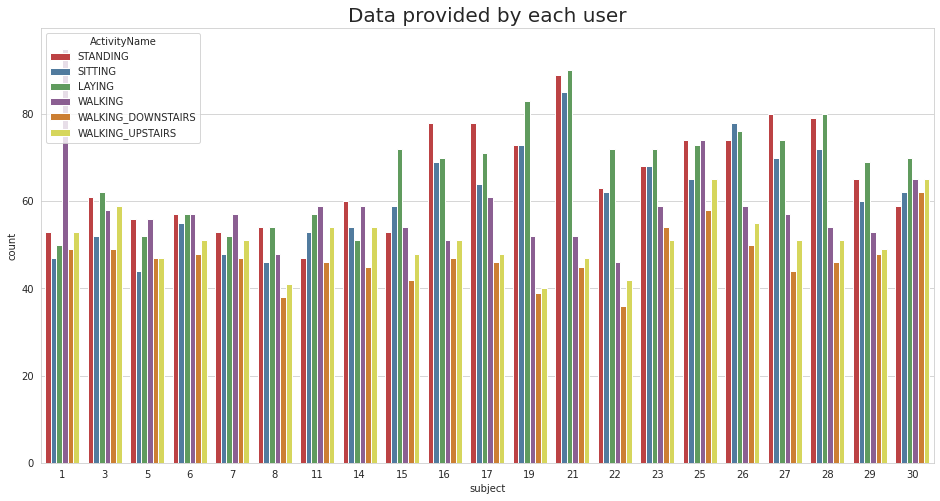

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='ActivityName', data = train)
plt.show()

> We have got almost same number of reading from all the subjects

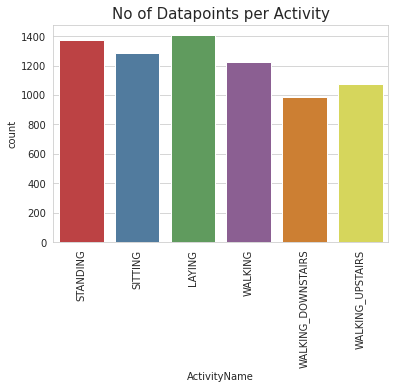

In [ ]:
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(train.ActivityName)
plt.xticks(rotation=90)
plt.show()

### Observation
> Our data is well balanced (almost)

## 4. Changing feature names 

In [ ]:
columns = train.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

test.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'Activity', 'ActivityName'],
      dtype='object', length=564)

## 5. Save this dataframe in a csv files

In [ ]:
train.to_csv('/content/Motor/UCI_HAR_dataset/train.csv', index=False)
test.to_csv('/content/Motor/UCI_HAR_dataset/test.csv', index=False)

# Exploratory Data Analysis

"___Without domain knowledge, EDA has no meaning, without EDA a problem has no soul.___"

### 1. Featuring Engineering from Domain Knowledge 




+ __Static and Dynamic Activities__

    - In static activities (sit, stand, lie down) motion information will not be very useful.
	- In the dynamic activities (Walking, WalkingUpstairs,WalkingDownstairs) motion info will be significant.




### 2. Stationary and Moving activities are completely different

In [ ]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='ActivityName', height=6,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMagmean', hist=False)\
    .add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,17), xytext=(-0.9, 23), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

In [ ]:
# for plotting purposes taking datapoints of each activity to a different dataframe
df1 = train[train['Activity']==1]
df2 = train[train['Activity']==2]
df3 = train[train['Activity']==3]
df4 = train[train['Activity']==4]
df5 = train[train['Activity']==5]
df6 = train[train['Activity']==6]

plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('Stationary Activities(Zoomed in)')
sns.distplot(df4['tBodyAccMagmean'],color = 'r',hist = False, label = 'Sitting')
sns.distplot(df5['tBodyAccMagmean'],color = 'm',hist = False,label = 'Standing')
sns.distplot(df6['tBodyAccMagmean'],color = 'c',hist = False, label = 'Laying')
plt.axis([-1.01, -0.5, 0, 35])
plt.legend(loc='center')

plt.subplot(2,2,2)
plt.title('Moving Activities')
sns.distplot(df1['tBodyAccMagmean'],color = 'red',hist = False, label = 'Walking')
sns.distplot(df2['tBodyAccMagmean'],color = 'blue',hist = False,label = 'Walking Up')
sns.distplot(df3['tBodyAccMagmean'],color = 'green',hist = False, label = 'Walking down')
plt.legend(loc='center right')


plt.tight_layout()
plt.show()

### 3. Magnitude of an acceleration can saperate it well

In [ ]:
plt.figure(figsize=(7,7))
sns.boxplot(x='ActivityName', y='tBodyAccMagmean',data=train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

__ Observations__:
- If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.
- If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
- If tAccMean > 0.0 then the Activity is WalkingDownstairs.
- We can classify 75% the Acitivity labels with some errors.

### 4. Position of GravityAccelerationComponants also matters 

In [ ]:
sns.boxplot(x='ActivityName', y='angleXgravityMean', data=train)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

__ Observations__:
* If angleX,gravityMean > 0 then Activity is Laying.
* We can classify all datapoints belonging to Laying activity with just a single if else statement.

In [ ]:
sns.boxplot(x='ActivityName', y='angleYgravityMean', data = train, showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

# Apply t-sne on the data 

In [ ]:
# performs t-sne with different perplexity values and their repective plots..
def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')


In [ ]:
X_pre_tsne = train.drop(['subject', 'Activity','ActivityName'], axis=1)
y_pre_tsne = train['ActivityName']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[2,5,10,20,50])


performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.550s...
[t-SNE] Computed neighbors for 7352 samples in 44.079s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.635854
[t-SNE] Computed conditional probabilities in 0.052s
[t-SNE] Iteration 50: error = 124.7557297, gradient norm = 0.0269173 (50 iterations in 11.106s)
[t-SNE] Iteration 100: error = 107.1301041, gradient norm = 0.0294448 (50 iterations i

## Apply Machine Learning Models

In [ ]:
train = pd.read_csv('/content/Motor/UCI_HAR_dataset/train.csv')
test = pd.read_csv('/content/Motor/UCI_HAR_dataset/test.csv')
print(train.shape, test.shape)

(7352, 564) (2947, 564)


In [ ]:
train.head(3)

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING


In [ ]:
# get x_train and y_train from csv files
x_train = train.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_train = train.ActivityName

# get x_test and y_test from test csv file
x_test = test.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_test = test.ActivityName

print('x_train and y_train : ({},{})'.format(x_train.shape, y_train.shape))
print('x_test  and y_test  : ({},{})'.format(x_test.shape, y_test.shape))

x_train and y_train : ((7352, 561),(7352,))
x_test  and y_test  : ((2947, 561),(2947,))


### Labels that are useful in plotting confusion matrix

In [ ]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

### Function to plot the confusion matrix

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Generic function to run any model specified

In [ ]:
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done \n \n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results

### Method to print the gridsearch Attributes

In [ ]:
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

# 1. Logistic Regression with Grid Search

In [ ]:
# start Grid search
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results =  perform_model(log_reg_grid, x_train, y_train, x_test, y_test, class_labels=labels)

In [ ]:
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(log_reg_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens)
plt.show()

In [ ]:
# observe the attributes of the model 
print_grid_search_attributes(log_reg_grid_results['model'])

#  2. Linear SVC with GridSearch

In [ ]:
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=-1, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid, x_train, y_train, x_test, y_test, class_labels=labels)

In [ ]:
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(lr_svc_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens)
plt.show()

In [ ]:
print_grid_search_attributes(lr_svc_grid_results['model'])

# 3.  RBF Kernel SVM with GridSearch

In [ ]:
parameters = {'C':[2,8,16],\
              'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=-1)
rbf_svm_grid_results = perform_model(rbf_svm_grid, x_train, y_train, x_test, y_test, class_labels=labels)

In [ ]:
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(rbf_svm_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens)
plt.show()

In [ ]:
print_grid_search_attributes(rbf_svm_grid_results['model'])

# 4. Decision Tree with GridSearch

In [ ]:
parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=-1)
dt_grid_results = perform_model(dt_grid, x_train, y_train, x_test, y_test, class_labels=labels)

In [ ]:
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(dt_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens)
plt.show()

In [ ]:
print_grid_search_attributes(dt_grid_results['model'])

# 5. Random Forest Classifier with GridSearch

In [ ]:
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1)
rfc_grid_results = perform_model(rfc_grid, x_train, y_train, x_test, y_test, class_labels=labels)

In [ ]:
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(rfc_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens)
plt.show()

In [ ]:
print_grid_search_attributes(rfc_grid_results['model'])

# 6.  Gradient Boosted Decision Trees With GridSearch

In [ ]:
param_grid = {'max_depth': np.arange(5,8,1), \
             'n_estimators':np.arange(130,170,10)}
gbdt = GradientBoostingClassifier()
gbdt_grid = GridSearchCV(gbdt, param_grid=param_grid, n_jobs=-1)
gbdt_grid_results = perform_model(gbdt_grid, x_train, y_train, x_test, y_test, class_labels=labels)

In [ ]:
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(gbdt_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens)
plt.show()

In [ ]:
print_grid_search_attributes(gbdt_grid_results['model'])

# 7. Comparing all models

In [ ]:
print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%       {:.04}%'.format(log_reg_grid_results['accuracy'] * 100,\
                                                  100-(log_reg_grid_results['accuracy'] * 100)))

print('Linear SVC          : {:.04}%       {:.04}% '.format(lr_svc_grid_results['accuracy'] * 100,\
                                                        100-(lr_svc_grid_results['accuracy'] * 100)))

print('RBF SVM classifier  : {:.04}%      {:.04}% '.format(rbf_svm_grid_results['accuracy'] * 100,\
                                                          100-(rbf_svm_grid_results['accuracy'] * 100)))

print('DecisionTree        : {:.04}%      {:.04}% '.format(dt_grid_results['accuracy'] * 100,\
                                                        100-(dt_grid_results['accuracy'] * 100)))

print('Random Forest       : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                           100-(rfc_grid_results['accuracy'] * 100)))
print('GradientBoosting DT : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                        100-(rfc_grid_results['accuracy'] * 100)))

> We can choose ___Logistic regression___ or ___Linear SVC___ or ___RBF SVM___.

<br>
<br>
<br>

## Apply Deep Learning Models

In [8]:
# Activities are the class labels
# It is a 6 class classification
ACTIVITIES = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
    3: 'SITTING',
    4: 'STANDING',
    5: 'LAYING',
}

# Data directory
DATADIR = 'UCI_HAR_Dataset'

# Raw data signals
# Signals are from Accelerometer and Gyroscope
# The signals are in x,y,z directions
# Sensor signals are filtered to have only body acceleration
# excluding the acceleration due to gravity
# Triaxial acceleration from the accelerometer is total acceleration
SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"
]

In [9]:
# Utility function to print the confusion matrix
def confusion_matrix_dl(Y_true, Y_pred):
    Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])
    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])

# Utility function to read the data from csv file
def _read_csv(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None)

# Utility function to load the load
def load_signals(subset):
    signals_data = []

    for signal in SIGNALS:
        filename = f'/content/Motor/UCI_HAR_dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
        signals_data.append(
            _read_csv(filename).as_matrix()
        ) 

    # Transpose is used to change the dimensionality of the output,
    # aggregating the signals by combination of sample/timestep.
    # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
    return np.transpose(signals_data, (1, 2, 0))

def load_y(subset):
    """
    The objective that we are trying to predict is a integer, from 1 to 6,
    that represents a human activity. We return a binary representation of 
    every sample objective as a 6 bits vector using One Hot Encoding
    (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
    """
    filename = f'/content/Motor/UCI_HAR_dataset/{subset}/y_{subset}.txt'
    y = _read_csv(filename)[0]

    return pd.get_dummies(y).as_matrix()

def load_data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_test = load_y('train'), load_y('test')

    return X_train, X_test, y_train, y_test

# Utility function to count the number of classes
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [18]:
# Configuring a session
session_conf = tf.compat.v1.ConfigProto(
    intra_op_parallelism_threads=1,
    inter_op_parallelism_threads=1
)

sess =  tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

In [19]:
# Initializing parameters
epochs = 30
batch_size = 16
n_hidden = 32

In [20]:
# Loading the train and test data
x_train, x_test, y_train, y_test = load_data()

In [21]:
timesteps = len(x_train[0])
input_dim = len(x_train[0][0])
n_classes = _count_classes(y_train)

print(timesteps)
print(input_dim)
print(len(x_train))

128
9
7352


## 1-Layer of LSTM

In [22]:
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 32)                5376      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 198       
Total params: 5,574
Trainable params: 5,574
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [24]:
# Training the model
model.fit(x_train,
          y_train,
          batch_size=batch_size,
          validation_data=(x_test, y_test),
          epochs=epochs)

Epoch 1/30
460/460 [==============================] - 4s 10ms/step - loss: 1.2670 - accuracy: 0.4976 - val_loss: 1.0124 - val_accuracy: 0.5643
Epoch 2/30
460/460 [==============================] - 4s 9ms/step - loss: 0.8744 - accuracy: 0.6187 - val_loss: 0.8265 - val_accuracy: 0.5711
Epoch 3/30
460/460 [==============================] - 4s 8ms/step - loss: 0.7698 - accuracy: 0.6254 - val_loss: 0.8362 - val_accuracy: 0.6047
Epoch 4/30
460/460 [==============================] - 4s 9ms/step - loss: 0.7473 - accuracy: 0.6507 - val_loss: 0.7755 - val_accuracy: 0.6213
Epoch 5/30
460/460 [==============================] - 4s 9ms/step - loss: 0.6877 - accuracy: 0.6672 - val_loss: 0.7296 - val_accuracy: 0.6220
Epoch 6/30
460/460 [==============================] - 4s 9ms/step - loss: 0.7077 - accuracy: 0.6674 - val_loss: 0.7562 - val_accuracy: 0.6451
Epoch 7/30
460/460 [==============================] - 4s 9ms/step - loss: 0.5989 - accuracy: 0.7281 - val_loss: 0.6840 - val_accuracy: 0.7350
Epoch

In [25]:
# Confusion Matrix
print(confusion_matrix_dl(y_test, model.predict(x_test)))

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 495       19         0        4                   0   
SITTING                  0      414        77        0                   0   
STANDING                 0      100       432        0                   0   
WALKING                  0        2         2      450                  38   
WALKING_DOWNSTAIRS       0        0         0        1                 419   
WALKING_UPSTAIRS         0        1         2       29                  21   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                            19  
SITTING                            0  
STANDING                           0  
WALKING                            4  
WALKING_DOWNSTAIRS                 0  
WALKING_UPSTAIRS                 418  


In [26]:
score = model.evaluate(x_test, y_test)

93/93 [==============================] - 0s 4ms/step - loss: 0.4248 - accuracy: 0.8918


In [27]:
score

[0.4248107671737671, 0.8917543292045593]

## 2-Layer of LSTM with more hyperparameter tunning

### Tuning the Number of neurons with dropout of 0.50

Configuration:

In [28]:
# Initializing parameters
n_epochs = 30
n_batch = 16
n_classes = _count_classes(y_train)

# Bias regularizer value - we will use elasticnet
reg = L1L2(0.01, 0.01)

In [29]:
# Plot Confusion Matrix
def plot_confusion_matrix_lstm(y_test, y_predict):
    result = confusion_matrix(y_test, y_predict)

    plt.figure(figsize=(12, 10))
    sns.heatmap(result, 
                xticklabels= list(ACTIVITIES.values()), 
                yticklabels=list(ACTIVITIES.values()), 
                annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()  
    
# Plot train and cross validation loss
def plot_train_cv_loss(trained_model, epochs, colors=['b']):
    fig, ax = plt.subplots(1,1)    
    ax.set_xlabel('epoch') 
    ax.set_ylabel('Categorical Crossentropy Loss')
    x_axis_values = list(range(1,epochs+1))

    validation_loss = trained_model.history['val_loss']
    train_loss = trained_model.history['loss']   
    
    ax.plot(x_axis_values, validation_loss, 'b', label="Validation Loss")
    ax.plot(x_axis_values, train_loss, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw() 

### 32 neurons in LSTM Layer with dropout of 0.50

In [30]:
# Model execution
model = Sequential()
model.add(LSTM(32, input_shape=(timesteps, input_dim), return_sequences=True,bias_regularizer=reg ))
model.add(BatchNormalization())
model.add(Dropout(0.50))
model.add(LSTM(32))
model.add(Dropout(0.50))
model.add(Dense(n_classes, activation='sigmoid'))
print("Model Summary: ")
model.summary()

Model Summary: 
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128, 32)           5376      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 32)           128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128, 32)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 198       
Total params: 14,022
Trainable params: 13,958
Non-trainable params: 64
_________________________________

In [31]:
model.compile(loss='categorical_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])

In [32]:
start = datetime.now()

# Training the model
trained_model  = model.fit(x_train,
                           y_train,
                           batch_size=n_batch,
                           validation_data=(x_test, y_test),
                           epochs=n_epochs)

print("\n Time Taken: ",datetime.now() - start)

Epoch 1/30
460/460 [==============================] - 7s 16ms/step - loss: 1.5499 - accuracy: 0.5516 - val_loss: 1.2228 - val_accuracy: 0.5521
Epoch 2/30
460/460 [==============================] - 7s 15ms/step - loss: 0.9111 - accuracy: 0.7063 - val_loss: 0.6443 - val_accuracy: 0.8331
Epoch 3/30
460/460 [==============================] - 7s 15ms/step - loss: 0.5390 - accuracy: 0.8547 - val_loss: 0.3667 - val_accuracy: 0.8877
Epoch 4/30
460/460 [==============================] - 7s 14ms/step - loss: 0.3884 - accuracy: 0.8938 - val_loss: 0.3457 - val_accuracy: 0.8846
Epoch 5/30
460/460 [==============================] - 7s 15ms/step - loss: 0.2972 - accuracy: 0.9187 - val_loss: 0.3487 - val_accuracy: 0.8670
Epoch 6/30
460/460 [==============================] - 7s 14ms/step - loss: 0.2582 - accuracy: 0.9192 - val_loss: 0.3371 - val_accuracy: 0.8809
Epoch 7/30
460/460 [==============================] - 7s 15ms/step - loss: 0.2445 - accuracy: 0.9263 - val_loss: 0.2633 - val_accuracy: 0.8985

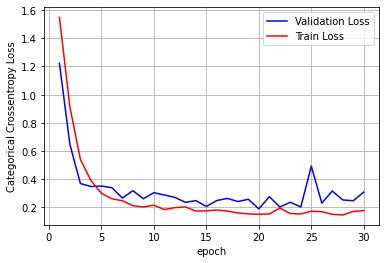

In [33]:
print()
print()

# Plot train and cross validation error
plot_train_cv_loss(trained_model, n_epochs)

From epoch 10, we starts to overfit the model, so best value for epoch is 10


Test Accuracy: 91.957921%



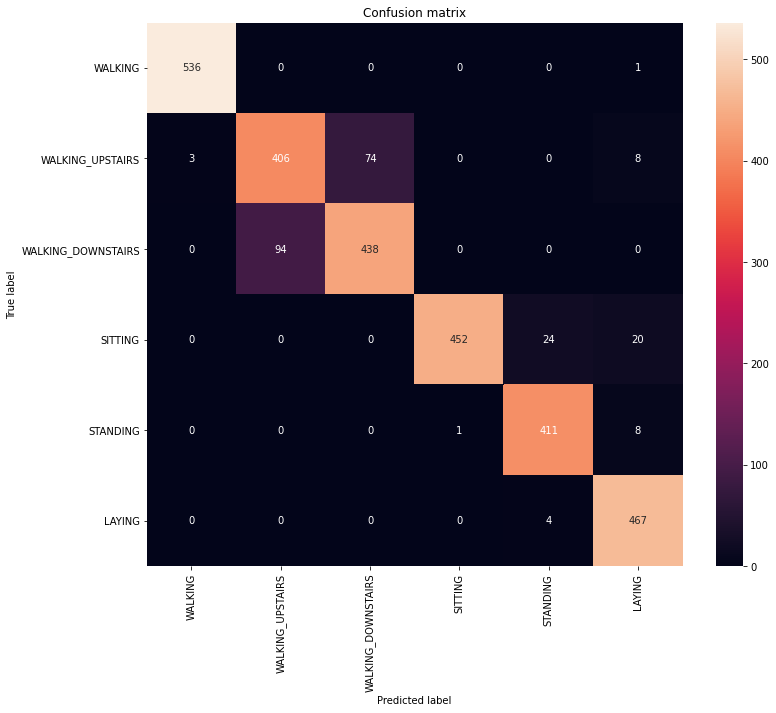

In [34]:
print()
scores = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy: %f%%" % (scores[1]*100))
print()

Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(y_test, axis=1)])
Y_predictions = pd.Series([ACTIVITIES[y] for y in np.argmax(model.predict(x_test), axis=1)])

# Confusion Matrix
plot_confusion_matrix_lstm(Y_true, Y_predictions)

<br/>
<br/>

### 48 neurons in LSTM Layer with dropout of 0.50

In [35]:
# Model execution
model = Sequential()
model.add(LSTM(48, input_shape=(timesteps, input_dim), return_sequences=True, bias_regularizer=reg))
model.add(BatchNormalization())
model.add(Dropout(0.50))
model.add(LSTM(32))
model.add(Dropout(0.50))
model.add(Dense(n_classes, activation='sigmoid'))
print("Model Summary: ")
model.summary()

Model Summary: 
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 128, 48)           11136     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 48)           192       
_________________________________________________________________
dropout_3 (Dropout)          (None, 128, 48)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 32)                10368     
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 198       
Total params: 21,894
Trainable params: 21,798
Non-trainable params: 96
_________________________________

In [36]:
model.compile(loss='categorical_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])

In [37]:
start = datetime.now()

# Training the model
trained_model  = model.fit(x_train,
                           y_train,
                           batch_size=n_batch,
                           validation_data=(x_test, y_test),
                           epochs=n_epochs)

print("\n Time Taken: ",datetime.now() - start)

Epoch 1/30
460/460 [==============================] - 7s 16ms/step - loss: 1.7712 - accuracy: 0.6152 - val_loss: 1.2363 - val_accuracy: 0.7279
Epoch 2/30
460/460 [==============================] - 7s 14ms/step - loss: 0.9718 - accuracy: 0.7625 - val_loss: 0.7843 - val_accuracy: 0.7913
Epoch 3/30
460/460 [==============================] - 7s 15ms/step - loss: 0.5686 - accuracy: 0.8486 - val_loss: 0.3634 - val_accuracy: 0.9026
Epoch 4/30
460/460 [==============================] - 7s 15ms/step - loss: 0.3929 - accuracy: 0.8932 - val_loss: 0.4195 - val_accuracy: 0.8554
Epoch 5/30
460/460 [==============================] - 7s 15ms/step - loss: 0.3027 - accuracy: 0.9138 - val_loss: 0.3020 - val_accuracy: 0.9043
Epoch 6/30
460/460 [==============================] - 7s 15ms/step - loss: 0.2473 - accuracy: 0.9221 - val_loss: 0.2640 - val_accuracy: 0.9087
Epoch 7/30
460/460 [==============================] - 7s 15ms/step - loss: 0.2352 - accuracy: 0.9302 - val_loss: 0.3113 - val_accuracy: 0.8894

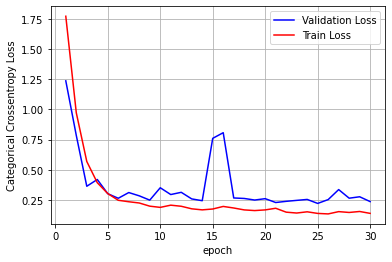

In [38]:
print()
print()

# Plot train and cross validation error
plot_train_cv_loss(trained_model, n_epochs)

From epoch 7, we starts to overfit the model, so best value for epoch is 7


Test Accuracy: 93.009841%



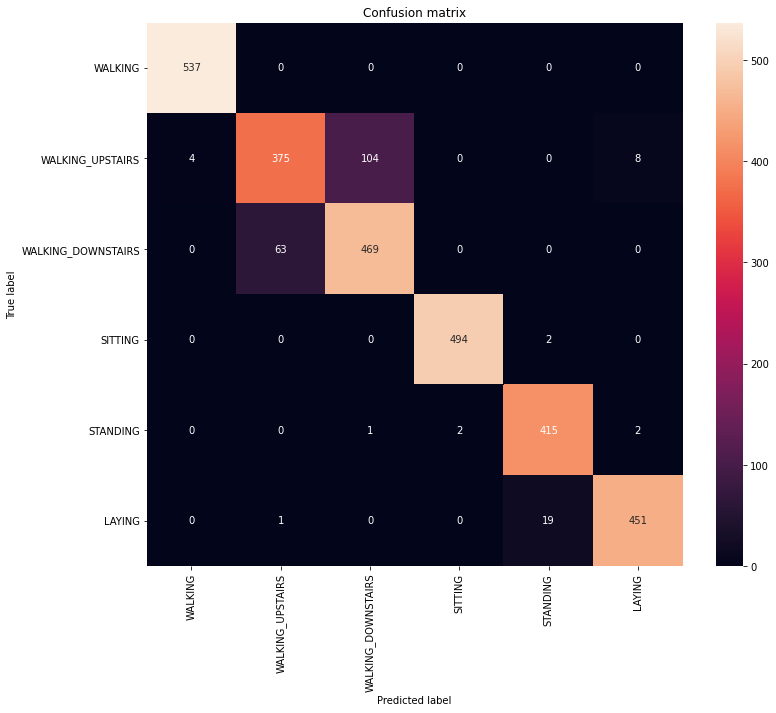

In [39]:
print()
scores = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy: %f%%" % (scores[1]*100))
print()

Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(y_test, axis=1)])
Y_predictions = pd.Series([ACTIVITIES[y] for y in np.argmax(model.predict(x_test), axis=1)])

# Confusion Matrix
plot_confusion_matrix_lstm(Y_true, Y_predictions)

<br/>
<br/>

### 64 neurons in LSTM Layer with dropout of 0.50

In [40]:
# Model execution
model = Sequential()
model.add(LSTM(64, input_shape=(timesteps, input_dim), return_sequences=True, bias_regularizer=reg))
model.add(BatchNormalization())
model.add(Dropout(0.50))
model.add(LSTM(48))
model.add(Dropout(0.50))
model.add(Dense(n_classes, activation='sigmoid'))
print("Model Summary: ")
model.summary()

Model Summary: 
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 128, 64)           18944     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128, 64)           256       
_________________________________________________________________
dropout_5 (Dropout)          (None, 128, 64)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 48)                21696     
_________________________________________________________________
dropout_6 (Dropout)          (None, 48)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 294       
Total params: 41,190
Trainable params: 41,062
Non-trainable params: 128
________________________________

In [41]:
model.compile(loss='categorical_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])

In [42]:
start = datetime.now()

# Training the model
trained_model  = model.fit(x_train,
                           y_train,
                           batch_size=n_batch,
                           validation_data=(x_test, y_test),
                           epochs=n_epochs)

print("\n Time Taken: ",datetime.now() - start)

Epoch 1/30
460/460 [==============================] - 7s 16ms/step - loss: 1.8661 - accuracy: 0.6356 - val_loss: 2.1192 - val_accuracy: 0.5372
Epoch 2/30
460/460 [==============================] - 7s 15ms/step - loss: 1.0439 - accuracy: 0.7413 - val_loss: 0.7101 - val_accuracy: 0.8409
Epoch 3/30
460/460 [==============================] - 7s 15ms/step - loss: 0.5172 - accuracy: 0.8671 - val_loss: 0.3725 - val_accuracy: 0.8761
Epoch 4/30
460/460 [==============================] - 7s 15ms/step - loss: 0.3051 - accuracy: 0.9101 - val_loss: 0.3278 - val_accuracy: 0.8867
Epoch 5/30
460/460 [==============================] - 7s 15ms/step - loss: 0.2676 - accuracy: 0.9157 - val_loss: 0.3523 - val_accuracy: 0.8728
Epoch 6/30
460/460 [==============================] - 7s 14ms/step - loss: 0.2292 - accuracy: 0.9266 - val_loss: 0.2276 - val_accuracy: 0.9101
Epoch 7/30
460/460 [==============================] - 7s 15ms/step - loss: 0.1776 - accuracy: 0.9365 - val_loss: 0.2401 - val_accuracy: 0.9063

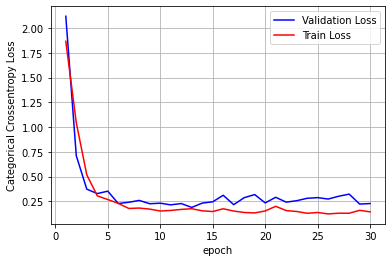

In [43]:
print()
print()

# Plot train and cross validation error
plot_train_cv_loss(trained_model, n_epochs)

From epoch 8, we starts to overfit the model, so best value for epoch is 8


Test Accuracy: 91.754329%



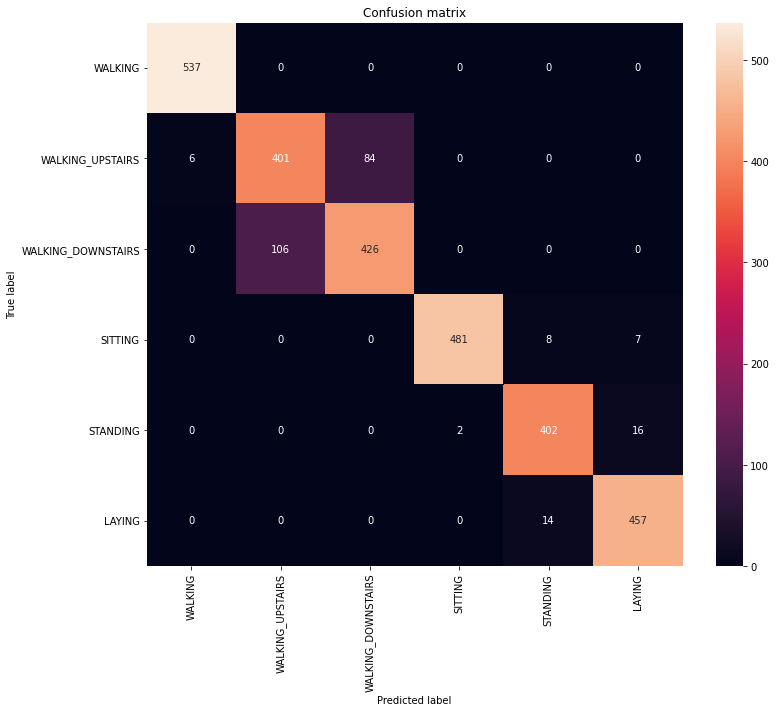

In [44]:
print()
scores = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy: %f%%" % (scores[1]*100))
print()

Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(y_test, axis=1)])
Y_predictions = pd.Series([ACTIVITIES[y] for y in np.argmax(model.predict(x_test), axis=1)])

# Confusion Matrix
plot_confusion_matrix_lstm(Y_true, Y_predictions)

<br/>
<br/>

### Tuning the number of neurons with dropout of 0.70

Configuration:

In [45]:
# Initializing parameters
n_epochs = 30
n_batch = 16
n_classes = _count_classes(y_train)

# Bias regularizer value - we will use elasticnet
reg = L1L2(0.01, 0.01)

### 32 neurons in LSTM Layer with dropout of 0.70

In [46]:
# Model execution
model = Sequential()
model.add(LSTM(32, input_shape=(timesteps, input_dim), return_sequences=True, bias_regularizer=reg))
model.add(BatchNormalization())
model.add(Dropout(0.70))
model.add(LSTM(32))
model.add(Dropout(0.70))
model.add(Dense(n_classes, activation='sigmoid'))
print("Model Summary: ")
model.summary()

Model Summary: 
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 128, 32)           5376      
_________________________________________________________________
batch_normalization_3 (Batch (None, 128, 32)           128       
_________________________________________________________________
dropout_7 (Dropout)          (None, 128, 32)           0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dropout_8 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 198       
Total params: 14,022
Trainable params: 13,958
Non-trainable params: 64
_________________________________

In [47]:
model.compile(loss='categorical_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])

In [48]:
start = datetime.now()

# Training the model
trained_model  = model.fit(x_train,
                           y_train,
                           batch_size=n_batch,
                           validation_data=(x_test, y_test),
                           epochs=n_epochs)

print("\n Time Taken: ",datetime.now() - start)

Epoch 1/30
460/460 [==============================] - 8s 17ms/step - loss: 1.7277 - accuracy: 0.5242 - val_loss: 1.2822 - val_accuracy: 0.5965
Epoch 2/30
460/460 [==============================] - 7s 15ms/step - loss: 1.1290 - accuracy: 0.5917 - val_loss: 1.0368 - val_accuracy: 0.6345
Epoch 3/30
460/460 [==============================] - 7s 14ms/step - loss: 0.9160 - accuracy: 0.6046 - val_loss: 0.7997 - val_accuracy: 0.5938
Epoch 4/30
460/460 [==============================] - 7s 15ms/step - loss: 0.8169 - accuracy: 0.6238 - val_loss: 0.7904 - val_accuracy: 0.5945
Epoch 5/30
460/460 [==============================] - 7s 15ms/step - loss: 0.7387 - accuracy: 0.6391 - val_loss: 0.7023 - val_accuracy: 0.6607
Epoch 6/30
460/460 [==============================] - 7s 15ms/step - loss: 0.7588 - accuracy: 0.6321 - val_loss: 0.6876 - val_accuracy: 0.6284
Epoch 7/30
460/460 [==============================] - 7s 15ms/step - loss: 0.7005 - accuracy: 0.6474 - val_loss: 0.7203 - val_accuracy: 0.6356

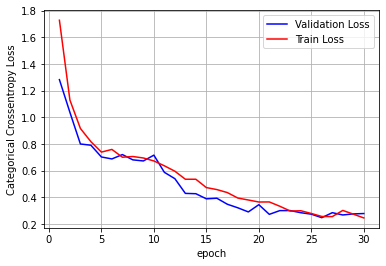

In [49]:
print()
print()

# Plot train and cross validation error
plot_train_cv_loss(trained_model, n_epochs)

From epoch 9, we starts to overfit the model, so best value for epoch is 9


Test Accuracy: 90.872073%



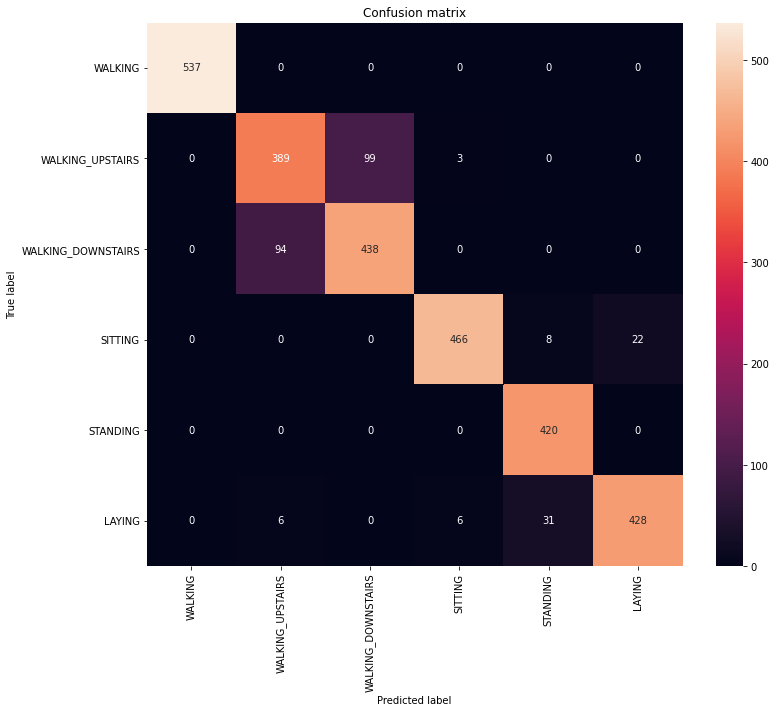

In [50]:
print()
scores = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy: %f%%" % (scores[1]*100))
print()

Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(y_test, axis=1)])
Y_predictions = pd.Series([ACTIVITIES[y] for y in np.argmax(model.predict(x_test), axis=1)])

# Confusion Matrix
plot_confusion_matrix_lstm(Y_true, Y_predictions)

<br/>
<br/>

### 48 neurons in LSTM Layer with dropout of 0.70

In [51]:
# Model execution
model = Sequential()
model.add(LSTM(48, input_shape=(timesteps, input_dim), return_sequences=True, bias_regularizer=reg))
model.add(BatchNormalization())
model.add(Dropout(0.70))
model.add(LSTM(32))
model.add(Dropout(0.70))
model.add(Dense(n_classes, activation='sigmoid'))
print("Model Summary: ")
model.summary()

Model Summary: 
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 128, 48)           11136     
_________________________________________________________________
batch_normalization_4 (Batch (None, 128, 48)           192       
_________________________________________________________________
dropout_9 (Dropout)          (None, 128, 48)           0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 32)                10368     
_________________________________________________________________
dropout_10 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 198       
Total params: 21,894
Trainable params: 21,798
Non-trainable params: 96
_________________________________

In [52]:
model.compile(loss='categorical_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])

In [53]:
start = datetime.now()

# Training the model
trained_model  = model.fit(x_train,
                           y_train,
                           batch_size=n_batch,
                           validation_data=(x_test, y_test),
                           epochs=n_epochs)

print("\n Time Taken: ",datetime.now() - start)

Epoch 1/30
460/460 [==============================] - 8s 16ms/step - loss: 1.9596 - accuracy: 0.5271 - val_loss: 1.5811 - val_accuracy: 0.5575
Epoch 2/30
460/460 [==============================] - 7s 15ms/step - loss: 1.2234 - accuracy: 0.6001 - val_loss: 0.9670 - val_accuracy: 0.6295
Epoch 3/30
460/460 [==============================] - 7s 15ms/step - loss: 0.8964 - accuracy: 0.6329 - val_loss: 0.7249 - val_accuracy: 0.6444
Epoch 4/30
460/460 [==============================] - 7s 15ms/step - loss: 0.8049 - accuracy: 0.6347 - val_loss: 0.6915 - val_accuracy: 0.6464
Epoch 5/30
460/460 [==============================] - 7s 15ms/step - loss: 0.7523 - accuracy: 0.6503 - val_loss: 0.6841 - val_accuracy: 0.6373
Epoch 6/30
460/460 [==============================] - 7s 16ms/step - loss: 0.7210 - accuracy: 0.6609 - val_loss: 0.6968 - val_accuracy: 0.6210
Epoch 7/30
460/460 [==============================] - 7s 15ms/step - loss: 0.7029 - accuracy: 0.6683 - val_loss: 0.6353 - val_accuracy: 0.6610

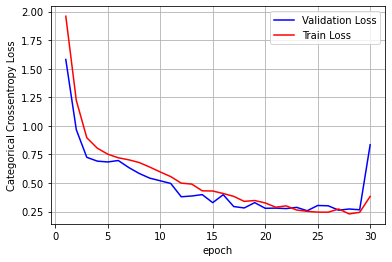

In [54]:
print()
print()

# Plot train and cross validation error
plot_train_cv_loss(trained_model, n_epochs)

From epoch 16, we starts to overfit the model, so best value for epoch is 16


Test Accuracy: 79.470646%



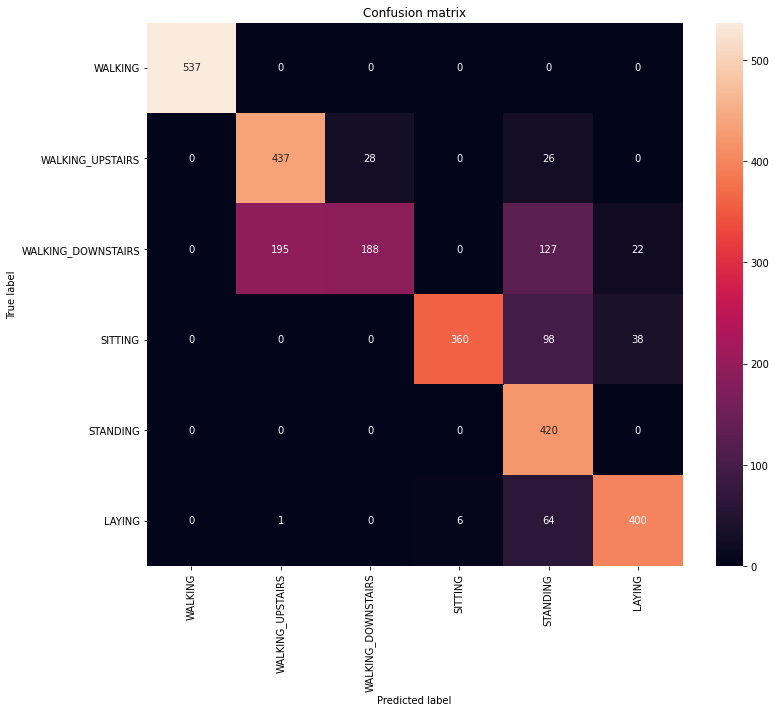

In [55]:
print()
scores = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy: %f%%" % (scores[1]*100))
print()

Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(y_test, axis=1)])
Y_predictions = pd.Series([ACTIVITIES[y] for y in np.argmax(model.predict(x_test), axis=1)])

# Confusion Matrix
plot_confusion_matrix_lstm(Y_true, Y_predictions)

<br/>
<br/>

### 64 neurons in LSTM Layer with dropout of 0.70

In [56]:
# Model execution
model = Sequential()
model.add(LSTM(64, input_shape=(timesteps, input_dim), return_sequences=True, bias_regularizer=reg))
model.add(BatchNormalization())
model.add(Dropout(0.70))
model.add(LSTM(48))
model.add(Dropout(0.70))
model.add(Dense(n_classes, activation='sigmoid'))
print("Model Summary: ")
model.summary()

Model Summary: 
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 128, 64)           18944     
_________________________________________________________________
batch_normalization_5 (Batch (None, 128, 64)           256       
_________________________________________________________________
dropout_11 (Dropout)         (None, 128, 64)           0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 48)                21696     
_________________________________________________________________
dropout_12 (Dropout)         (None, 48)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 294       
Total params: 41,190
Trainable params: 41,062
Non-trainable params: 128
________________________________

In [57]:
model.compile(loss='categorical_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])

In [58]:
start = datetime.now()

# Training the model
trained_model  = model.fit(x_train,
                           y_train,
                           batch_size=n_batch,
                           validation_data=(x_test, y_test),
                           epochs=n_epochs)

print("\n Time Taken: ",datetime.now() - start)

Epoch 1/30
460/460 [==============================] - 8s 17ms/step - loss: 2.0315 - accuracy: 0.5717 - val_loss: 1.6315 - val_accuracy: 0.5619
Epoch 2/30
460/460 [==============================] - 7s 15ms/step - loss: 1.1652 - accuracy: 0.6438 - val_loss: 0.8871 - val_accuracy: 0.6603
Epoch 3/30
460/460 [==============================] - 8s 16ms/step - loss: 0.7924 - accuracy: 0.6846 - val_loss: 0.6785 - val_accuracy: 0.7669
Epoch 4/30
460/460 [==============================] - 7s 15ms/step - loss: 0.6477 - accuracy: 0.7199 - val_loss: 0.6387 - val_accuracy: 0.7648
Epoch 5/30
460/460 [==============================] - 7s 16ms/step - loss: 0.5138 - accuracy: 0.8005 - val_loss: 0.5723 - val_accuracy: 0.8124
Epoch 6/30
460/460 [==============================] - 7s 15ms/step - loss: 0.4437 - accuracy: 0.8409 - val_loss: 0.4095 - val_accuracy: 0.8704
Epoch 7/30
460/460 [==============================] - 7s 15ms/step - loss: 0.3600 - accuracy: 0.8847 - val_loss: 0.3364 - val_accuracy: 0.8833

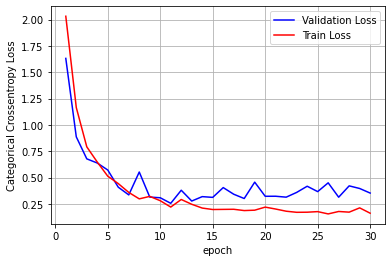

In [59]:
print()
print()

# Plot train and cross validation error
plot_train_cv_loss(trained_model, n_epochs)

From epoch 7, we starts to overfit the model, so best value for epoch is 7


Test Accuracy: 91.923988%



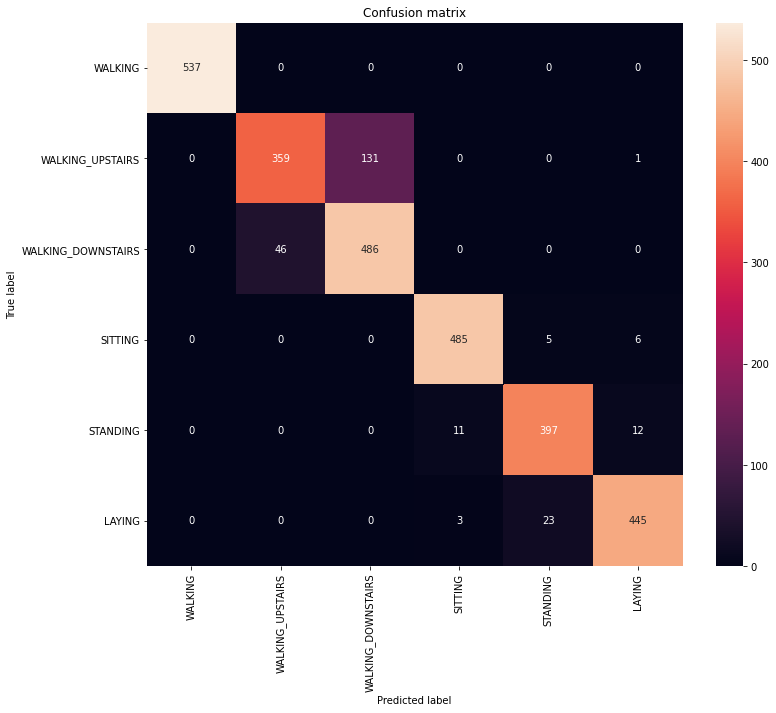

In [60]:
print()
scores = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy: %f%%" % (scores[1]*100))
print()

Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(y_test, axis=1)])
Y_predictions = pd.Series([ACTIVITIES[y] for y in np.argmax(model.predict(x_test), axis=1)])

# Confusion Matrix
plot_confusion_matrix_lstm(Y_true, Y_predictions)

<h2> Conclusion </h2>

In [61]:
from prettytable import PrettyTable
ptable = PrettyTable()
ptable.title = " Model Comparision "
ptable.field_names = ["LSTM Layers",'No. of Neurons in LSTM Layer','Dropout', 'Best Epoch']
ptable.add_row(["2","32","0.50","10"])
ptable.add_row(["2","48","0.50","7"])
ptable.add_row(["2","64","0.50","8"])
ptable.add_row(["\n","\n","\n","\n"])
ptable.add_row(["2","32","0.70","9"])
ptable.add_row(["2","48","0.70","16"])
ptable.add_row(["2","64","0.70","7"])
print(ptable)

+-------------+------------------------------+---------+------------+
| LSTM Layers | No. of Neurons in LSTM Layer | Dropout | Best Epoch |
+-------------+------------------------------+---------+------------+
|      2      |              32              |   0.50  |     10     |
|      2      |              48              |   0.50  |     7      |
|      2      |              64              |   0.50  |     8      |
|             |                              |         |            |
|             |                              |         |            |
|      2      |              32              |   0.70  |     9      |
|      2      |              48              |   0.70  |     16     |
|      2      |              64              |   0.70  |     7      |
+-------------+------------------------------+---------+------------+


From all the plots, we have observed that 64 neurons with 0.50 dropout rate will be the good choice, among all the models.